# <center> <font size=8> **Laboratorio 3** </font> </center>
# <center> <font size=4> *Daniel Machic (22118), María José Ramírez (221051)* </font> </center>

#### Importando los paquetes necesarios

In [16]:
import os
import shutil
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image as kerasImg

In [17]:
folder = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/m0/"

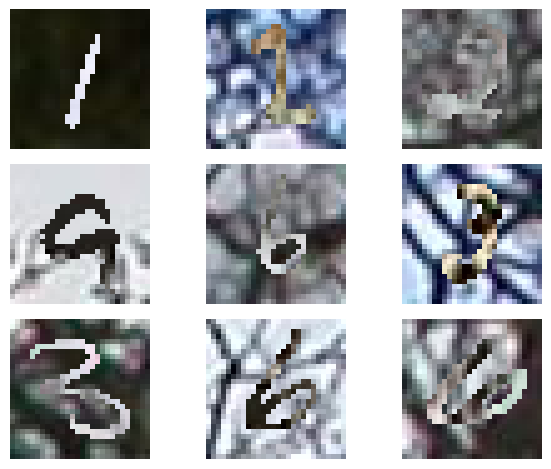

In [18]:
for i, img_name in enumerate(os.listdir(folder)[:9]):
    plt.subplot(330 + 1 + i)
    image = imread(os.path.join(folder, img_name))
    plt.imshow(image)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
base_folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
train_folder = os.path.join(base_folder, "train")  # imágenes organizadas por clases 0–9
val_folder = os.path.join(base_folder, "val")      # validación organizada igual

In [20]:
# Rutas base
src_base = "/Users/danielmachic/Desktop/Data Science/CNN/archive/PolyMNIST/MMNIST/train/"
dest_base = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Subcarpetas nuevas separación de carpetas por número
subdirs = ['train', 'val']
labels = [str(i) for i in range(10)]  # dígitos del 0 al 9

# Crear carpetas destino (una por clase/dígito)
for subdir in subdirs:
    for label in labels:
        newdir = os.path.join(dest_base, subdir, label)
        os.makedirs(newdir, exist_ok=True)

# Fijar semilla para reproducibilidad
random.seed(1)
val_ratio = 0.25

# Recorrer carpetas m0 a m4
modalities = ['m0', 'm1', 'm2', 'm3', 'm4']
for modality in modalities:
    src_dir = os.path.join(src_base, modality)
    for img_name in os.listdir(src_dir):
        try:
            # Obtener etiqueta desde el nombre del archivo (después del punto)
            label = img_name.split(".")[1]
            if label not in labels:
                continue  # ignorar si no es una etiqueta válida

            # Decidir destino
            subset = 'val' if random.random() < val_ratio else 'train'
            dest_dir = os.path.join(dest_base, subset, label)

            # Copiar imagen
            src_path = os.path.join(src_dir, img_name)
            dest_path = os.path.join(dest_dir, f"{modality}_{img_name}")  # mantener el origen en el nombre
            shutil.copy2(src_path, dest_path)
        except Exception as e:
            print(f"Error copiando {img_name}: {e}")

In [21]:
# Validación de que las carpetas sean creadas correctamente
train_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/train/"
print("Carpetas en train:", os.listdir(train_path))

val_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/val/"
print("Carpetas en val:", os.listdir(val_path))

Carpetas en train: ['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
Carpetas en val: ['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']


### Cargar todas en memoria

In [22]:
# Carpetas base reorganizadas por clases (0 a 9)
base_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")

# Contenedores
fotos_train = []
etiquetas_train = []
fotos_val = []
etiquetas_val = []

# Dimensiones estándar
target_size = (64, 64)

# Leer carpetas por clase
clases = sorted([
    d for d in os.listdir(train_path)
    if os.path.isdir(os.path.join(train_path, d))
])

# Cargar imágenes de entrenamiento
for clase in clases:
    clase_dir = os.path.join(train_path, clase)
    for file in os.listdir(clase_dir):
        img_path = os.path.join(clase_dir, file)
        image = load_img(img_path, target_size=target_size, color_mode="rgb")
        image = img_to_array(image)
        fotos_train.append(image)
        etiquetas_train.append(int(clase))  # Usamos el nombre de la carpeta como clase

# Cargar imágenes de validación
for clase in clases:
    clase_dir = os.path.join(val_path, clase)
    for file in os.listdir(clase_dir):
        img_path = os.path.join(clase_dir, file)
        image = load_img(img_path, target_size=target_size, color_mode="rgb")
        image = img_to_array(image)
        fotos_val.append(image)
        etiquetas_val.append(int(clase))

# Convertir a arrays
fotos_train = np.asarray(fotos_train, dtype=np.float32) / 255.0  # Normalizar
etiquetas_train = np.asarray(etiquetas_train)

fotos_val = np.asarray(fotos_val, dtype=np.float32) / 255.0
etiquetas_val = np.asarray(etiquetas_val)

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


In [23]:
# Guardar
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy", fotos_train)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy", etiquetas_train)

np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy", fotos_val)
np.save("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy", etiquetas_val)

In [24]:
fotos_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_train.npy")
etiquetas_train = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_train.npy")

fotos_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_photos_val.npy")
etiquetas_val = np.load("/Users/danielmachic/Desktop/Data Science/CNN/polyMNIST_labels_val.npy")

print("Train:", fotos_train.shape, etiquetas_train.shape)
print("Val:  ", fotos_val.shape, etiquetas_val.shape)

Train: (224641, 64, 64, 3) (224641,)
Val:   (75359, 64, 64, 3) (75359,)


In [25]:
# Ahora hay 10 clases (0 a 9)
etiquetas_train_ohe = to_categorical(etiquetas_train, num_classes=10)
etiquetas_val_ohe = to_categorical(etiquetas_val, num_classes=10)

## Documentación de las transformaciones aplicadas

Transformaciones aplicadas:
1. Reescalado: Todas las imágenes se normalizan dividiendo por 255.0 para que los valores estén en [0,1].
2. Cambio de tamaño: Todas las imágenes se redimensionan a 64x64 pixeles.
3. Data Augmentation (solo para entrenamiento en modelo4):
    - width_shift_range=0.1 (corrimientos horizontales aleatorios)
    - height_shift_range=0.1 (corrimientos verticales aleatorios)
    - horizontal_flip=True (volteo horizontal aleatorio)
4. One-hot encoding: Las etiquetas son codificadas en vectores de 10 posiciones (una por clase) usando 'to_categorical'.

## Análisis Exploratorio
Veamos si el conjunto de datos está balanceado

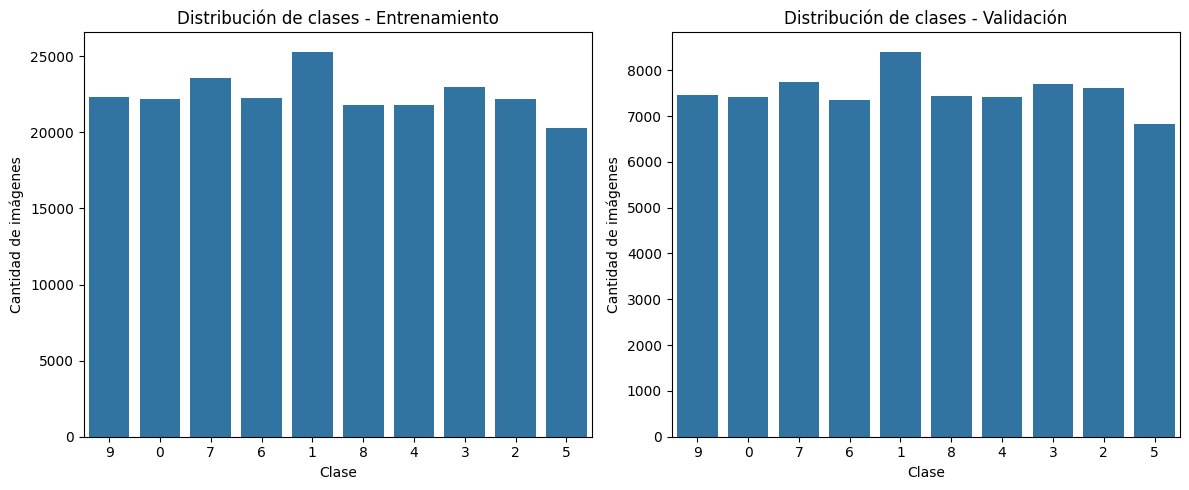

In [27]:
# Rutas
train_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/train"
val_path = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/val"

# Contar ejemplos por clase
def contar_clases(path):
    conteos = {}
    for clase in os.listdir(path):
        clase_path = os.path.join(path, clase)
        if os.path.isdir(clase_path):
            conteos[clase] = len(os.listdir(clase_path))
    return conteos

conteo_train = contar_clases(train_path)
conteo_val = contar_clases(val_path)

# Graficar
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=list(conteo_train.keys()), y=list(conteo_train.values()))
plt.title("Distribución de clases - Entrenamiento")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")

plt.subplot(1,2,2)
sns.barplot(x=list(conteo_val.keys()), y=list(conteo_val.values()))
plt.title("Distribución de clases - Validación")
plt.xlabel("Clase")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Tanto el conjunto de entrenamiento como el de validación están balanceados. Esto es positivo, ya que los modelos entrenados no estarán inclinados a favorecer una clase sobre otra simplemente por mayor frecuencia en los datos.


## CNN Simple

In [18]:
modelo1 = keras.Sequential()
modelo1.add(keras.layers.Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo1.add(keras.layers.MaxPooling2D((2,2)))
modelo1.add(keras.layers.Flatten())
modelo1.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo1.add(keras.layers.Dense(10, activation='softmax'))  # ← 10 clases ahora

# Compilar
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
modelo1.summary()

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,196,618 (16.01 MB)

 Trainable params: 4,196,618 (16.01 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo Simple

In [19]:
# Ruta base
folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"

# Normalización
datagen = ImageDataGenerator(rescale=1.0/255.0)

# Generador para entrenamiento
train_it = datagen.flow_from_directory(
    directory=os.path.join(folder, "train"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

# Generador para validación
val_it = datagen.flow_from_directory(
    directory=os.path.join(folder, "val"),
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

Found 224641 images belonging to 10 classes.
Found 75359 images belonging to 10 classes.


In [20]:
history = modelo1.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=5,
    verbose=True)
modelo1.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo1_polyMNIST.keras")

Epoch 1/5


/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 101s 29ms/step - accuracy: 0.7961 - loss: 0.6504 - val_accuracy: 0.9302 - val_loss: 0.2238
Epoch 2/5
   1/3510 ━━━━━━━━━━━━━━━━━━━━ 1:14 21ms/step - accuracy: 1.0000 - loss: 0.0556

/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3510/3510 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 1.0000 - loss: 0.0556 - val_accuracy: 0.9304 - val_loss: 0.2230
Epoch 3/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 101s 29ms/step - accuracy: 0.9442 - loss: 0.1748 - val_accuracy: 0.9446 - val_loss: 0.1781
Epoch 4/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9375 - loss: 0.1510 - val_accuracy: 0.9444 - val_loss: 0.1774
Epoch 5/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - accuracy: 0.9659 - loss: 0.1064 - val_accuracy: 0.9545 - val_loss: 0.1487


#### Validación  de resultados del Modelo Simple

In [21]:
# Evaluación
loss, acc = modelo1.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9544 - loss: 0.1487
> Precisión en validación: 95.45%


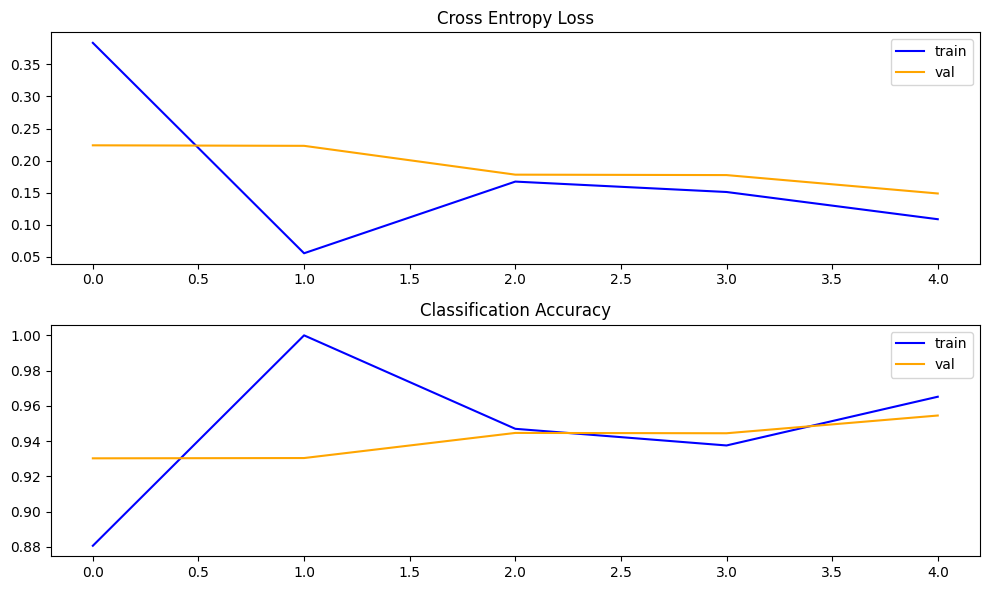

In [22]:
# Graficar pérdida y precisión
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar, el modelo presenta un desempeño excelente. El accuracy alcanza aproximadamente un 95.45% tanto en el conjunto de entrenamiento como en el de validación. En las gráficas se muestran la pérdida y la exactitud para ambos conjuntos: entrenamiento (azul) y validación (naranja).

En el gráfico de la pérdida (loss), esta disminuye rápidamente durante las primeras épocas y se estabiliza en valores muy bajos, lo cual indica que el modelo está aprendiendo de manera efectiva sin señales claras de sobreajuste. Por otro lado, en la exactitud (accuracy), se observa un crecimiento constante durante las primeras épocas hasta alcanzar una meseta muy cercana al 100%.

Esto sugiere que el modelo ha logrado generalizar bien a los datos de validación y que entrenarlo por más épocas probablemente no genere mejoras significativas. El comportamiento de las curvas indica un buen balance entre el aprendizaje y la capacidad de generalización.

## CNN VGG

In [23]:
modelo2 = keras.Sequential()
modelo2.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

modelo2.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo2.add(keras.layers.MaxPooling2D((2, 2)))

modelo2.add(keras.layers.Flatten())
modelo2.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Salida: 10 clases (0–9)
modelo2.add(keras.layers.Dense(10, activation='softmax'))

# Compilar modelo
opt = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
modelo2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo VGG

In [24]:
history2 = modelo2.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=5,
    verbose=True)
modelo2.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo2_polyMNIST.keras")

Epoch 1/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 182s 52ms/step - accuracy: 0.8633 - loss: 0.4356 - val_accuracy: 0.9692 - val_loss: 0.0974
Epoch 2/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 1.0000 - loss: 0.0403 - val_accuracy: 0.9687 - val_loss: 0.0987
Epoch 3/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 182s 52ms/step - accuracy: 0.9776 - loss: 0.0704 - val_accuracy: 0.9783 - val_loss: 0.0686
Epoch 4/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9531 - loss: 0.1150 - val_accuracy: 0.9785 - val_loss: 0.0674
Epoch 5/5
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 186s 53ms/step - accuracy: 0.9901 - loss: 0.0326 - val_accuracy: 0.9816 - val_loss: 0.0576


#### Validación de resultados del modelo VGG

In [25]:
# Evaluación final en el conjunto de validación
loss2, acc2 = modelo2.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc2 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9816 - loss: 0.0581
> Precisión en validación: 98.16%


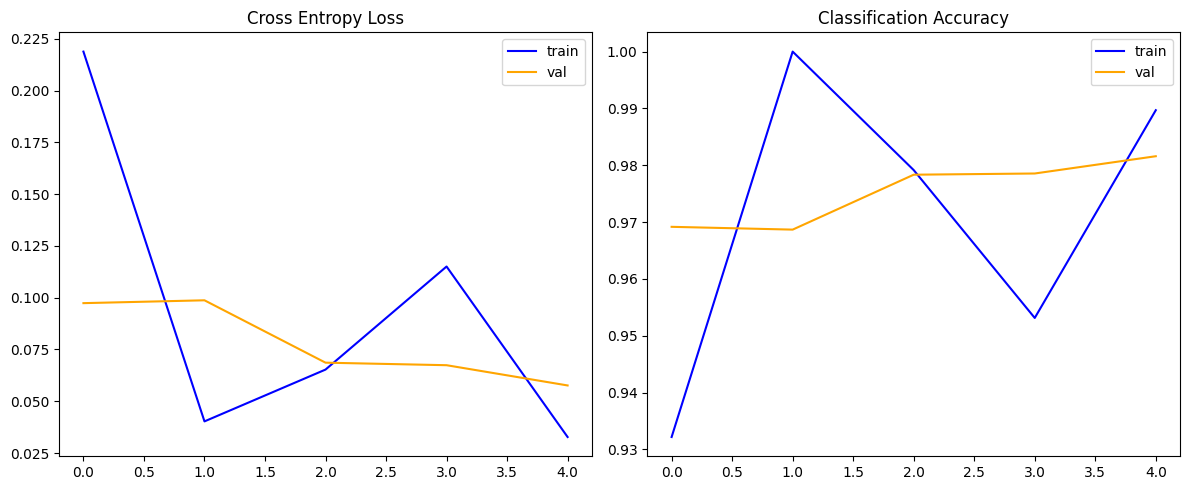

In [26]:
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.title('Cross Entropy Loss')
plt.plot(history2.history['loss'], color='blue', label='train')
plt.plot(history2.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Classification Accuracy')
plt.plot(history2.history['accuracy'], color='blue', label='train')
plt.plot(history2.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

Como se puede observar, el modelo presenta mejor desempeño, mejorando el modelo anterior. El accuracy alcanza aproximadamente un 98.16% tanto en el conjunto de entrenamiento como en el de validación. En las gráficas se muestran la pérdida y la exactitud para ambos conjuntos: entrenamiento (azul) y validación (naranja).

En el gráfico de la pérdida (loss), esta disminuye rápidamente durante las primeras épocas y se estabiliza en valores muy bajos, lo cual indica que el modelo está aprendiendo de manera efectiva sin señales claras de sobreajuste. Por otro lado, en la exactitud (accuracy), se observa un crecimiento constante durante las primeras épocas hasta alcanzar una meseta muy cercana al 100%.

Esto sugiere que el modelo ha logrado generalizar bien a los datos de validación y que entrenarlo por más épocas probablemente no genere mejoras significativas. El comportamiento de las curvas indica un buen balance entre el aprendizaje y la capacidad de generalización.

## CNN Dropout

In [81]:
modelo3 = keras.Sequential()
modelo3.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo3.add(keras.layers.MaxPooling2D((2, 2)))
modelo3.add(keras.layers.Dropout(0.1))  # Dropout para reducir overfitting

modelo3.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo3.add(keras.layers.MaxPooling2D((2, 2)))
modelo3.add(keras.layers.Dropout(0.1))

modelo3.add(keras.layers.Flatten())
modelo3.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))

# Salida para 10 clases
modelo3.add(keras.layers.Dense(10, activation='softmax'))

# Compilar modelo
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo3.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo CNN

In [82]:
history3 = modelo3.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=10,
    verbose=True)

modelo3.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo3_dropout_polyMNIST.keras")

Epoch 1/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 204s 58ms/step - accuracy: 0.7014 - loss: 0.9452 - val_accuracy: 0.9268 - val_loss: 0.2574
Epoch 2/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.9531 - loss: 0.2506 - val_accuracy: 0.9277 - val_loss: 0.2547
Epoch 3/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 197s 56ms/step - accuracy: 0.9282 - loss: 0.2377 - val_accuracy: 0.9487 - val_loss: 0.1780
Epoch 4/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9219 - loss: 0.1911 - val_accuracy: 0.9487 - val_loss: 0.1782
Epoch 5/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 188s 53ms/step - accuracy: 0.9500 - loss: 0.1678 - val_accuracy: 0.9587 - val_loss: 0.1398
Epoch 6/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9844 - loss: 0.0682 - val_accuracy: 0.9592 - val_loss: 0.1387
Epoch 7/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 196s 56ms/step - accuracy: 0.9612 - loss: 0.1287 - val_accuracy: 0.9634 - val_loss: 0.1240
Epoch 8/10
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 1.0000 -

#### Validación de resultados del Modelo CNN

In [83]:
# Evaluación
loss3, acc3 = modelo3.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.2f%%' % (acc3 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 25s 21ms/step - accuracy: 0.9675 - loss: 0.1046
> Precisión en validación: 96.78%


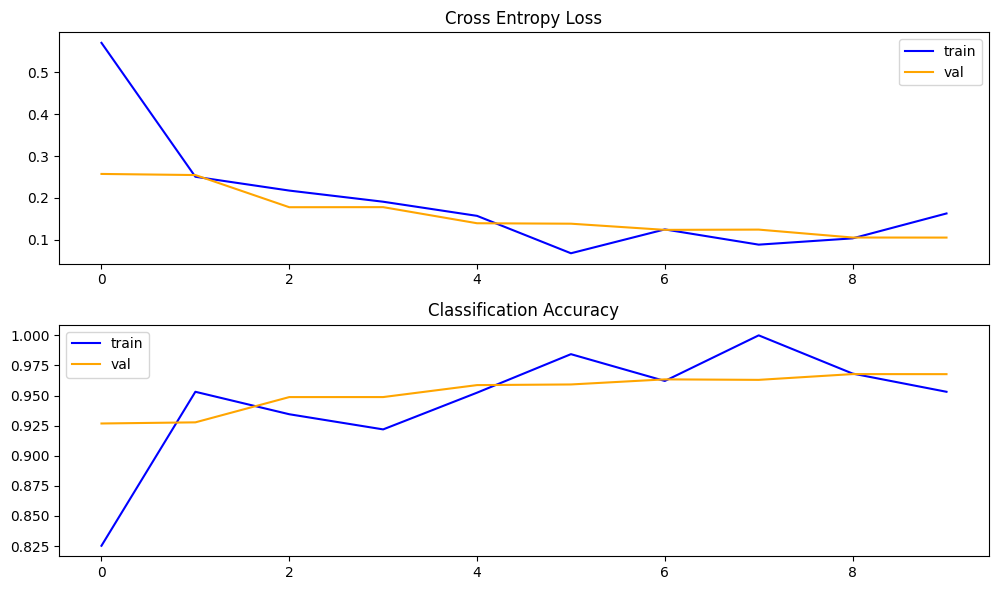

In [84]:
# Gráficas
plt.figure(figsize=(10, 6))

# Pérdida
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history3.history['loss'], color='blue', label='train')
plt.plot(history3.history['val_loss'], color='orange', label='val')
plt.legend()

# Precisión
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history3.history['accuracy'], color='blue', label='train')
plt.plot(history3.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

### CNN Augmented

In [ ]:
# Augmentación para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

# Solo reescalado para validación
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Cargar imágenes desde carpetas (10 clases: 0 a 9)
train_it = train_datagen.flow_from_directory(
    folder + "train/",
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

val_it = test_datagen.flow_from_directory(
    folder + "val/",
    class_mode='categorical',
    batch_size=64,
    target_size=(64, 64))

In [35]:
modelo4 = keras.Sequential()
modelo4.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
modelo4.add(keras.layers.MaxPooling2D((2, 2)))
# modelo4.add(keras.layers.Dropout(0.2))  # Puedes activarlo si ves overfitting

modelo4.add(keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
modelo4.add(keras.layers.MaxPooling2D((2, 2)))
# modelo4.add(keras.layers.Dropout(0.2))

modelo4.add(keras.layers.Flatten())
modelo4.add(keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
modelo4.add(keras.layers.Dense(10, activation='softmax'))  # ✅ 10 clases

# Compilación
opt = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
modelo4.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

modelo4.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,117,962 (8.08 MB)

 Trainable params: 2,117,962 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamos el modelo Augmented

In [37]:
history4 = modelo4.fit(
    train_it,
    steps_per_epoch=train_it.samples // train_it.batch_size,
    validation_data=val_it,
    validation_steps=val_it.samples // val_it.batch_size,
    epochs=3,  # Puedes subirlo a 10 si observas buen desempeño
    verbose=True)

modelo4.save("/Users/danielmachic/Desktop/Data Science/CNN/modelo4_augmented_polyMNIST.keras")

Epoch 1/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 206s 59ms/step - accuracy: 0.8104 - loss: 0.5840 - val_accuracy: 0.8797 - val_loss: 0.3903
Epoch 2/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8281 - loss: 0.6694 - val_accuracy: 0.8793 - val_loss: 0.3921
Epoch 3/3
3510/3510 ━━━━━━━━━━━━━━━━━━━━ 220s 63ms/step - accuracy: 0.8588 - loss: 0.4413 - val_accuracy: 0.9092 - val_loss: 0.2949


#### Validación de resultados del Modelo Augmented

In [38]:
# Evaluación
loss4, acc4 = modelo4.evaluate(val_it, steps=len(val_it), verbose=1)
print('> Precisión en validación: %.3f%%' % (acc4 * 100.0))

1178/1178 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9095 - loss: 0.2956
> Precisión en validación: 90.918%


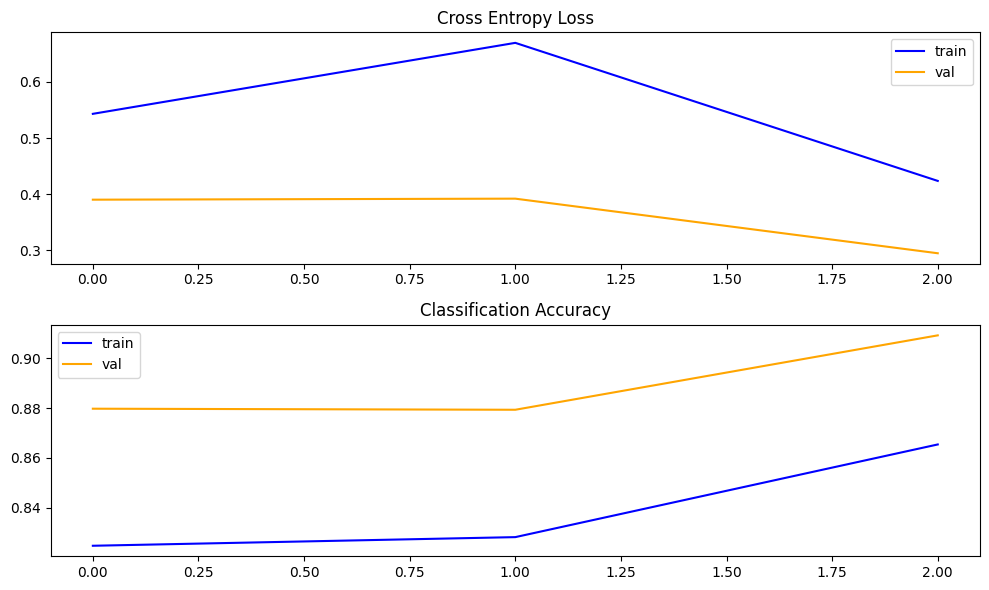

In [39]:
# Gráficas
plt.figure(figsize=(10, 6))

plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history4.history['loss'], color='blue', label='train')
plt.plot(history4.history['val_loss'], color='orange', label='val')
plt.legend()

plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history4.history['accuracy'], color='blue', label='train')
plt.plot(history4.history['val_accuracy'], color='orange', label='val')
plt.legend()

plt.tight_layout()
plt.show()

## Modelo alternativo: Red neuronal densa (sin convoluciones)

In [28]:
# 3. Modelo alternativo: Red neuronal densa (sin convoluciones)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import time

# Preparar datos
X_train = fotos_train.reshape((fotos_train.shape[0], -1))
X_val = fotos_val.reshape((fotos_val.shape[0], -1))
y_train = to_categorical(etiquetas_train, num_classes=10)
y_val = to_categorical(etiquetas_val, num_classes=10)

modelo_dense = Sequential()
modelo_dense.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
modelo_dense.add(Dense(128, activation='relu'))
modelo_dense.add(Dense(10, activation='softmax'))

modelo_dense.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

start = time.time()
history_dense = modelo_dense.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), verbose=True)
time_dense = time.time() - start


/Users/danielmachic/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 48s 14ms/step - accuracy: 0.5094 - loss: 1.5538 - val_accuracy: 0.5735 - val_loss: 1.4482
Epoch 2/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 34s 10ms/step - accuracy: 0.7302 - loss: 0.8417 - val_accuracy: 0.7199 - val_loss: 0.8633
Epoch 3/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 37s 10ms/step - accuracy: 0.7698 - loss: 0.7161 - val_accuracy: 0.7399 - val_loss: 0.8013
Epoch 4/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.7902 - loss: 0.6525 - val_accuracy: 0.7797 - val_loss: 0.7004
Epoch 5/5
3511/3511 ━━━━━━━━━━━━━━━━━━━━ 36s 10ms/step - accuracy: 0.8010 - loss: 0.6220 - val_accuracy: 0.8038 - val_loss: 0.6260


## Predicción

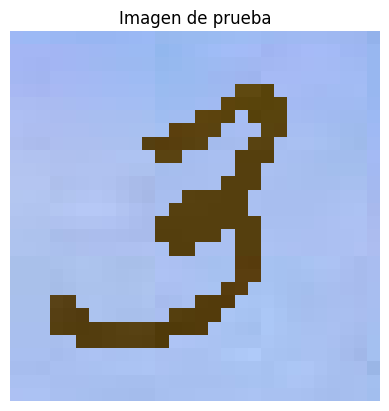

NameError: name 'modelo2' is not defined

In [30]:
# Ruta corregida a imagen de prueba
folder = "/Users/danielmachic/Desktop/Data Science/CNN/PolyMNIST_CNN/"
name = folder + "val/3/m0_4959.3.png"  # <-- imagen en la clase 3

# Mostrar imagen original
foto = imread(name)
plt.imshow(foto)
plt.axis('off')
plt.title("Imagen de prueba")
plt.show()

# Preparar imagen para el modelo
imagen = kerasImg.load_img(name, target_size=(64, 64))
imagen = kerasImg.img_to_array(imagen)
imagen = imagen.reshape(1, 64, 64, 3)
imagen = imagen.astype('float32') / 255.0  # Normalizar como en test_datagen

# Predecir con el modelo
pred = modelo2.predict(imagen)
clase_predicha = np.argmax(pred)

print(f"Predicción: número {clase_predicha}")
print(f"Vector de probabilidades: {pred}")

## Comparación de modelos

In [32]:
# 4. Comparación de modelos
resultados = {
    "Modelo": ["CNN Simple", "CNN VGG", "CNN Dropout", "CNN Augmented", "Red Densa"],
    "Accuracy": [acc1*100, acc2*100, acc3*100, acc4*100, history_dense.history['val_accuracy'][-1]*100],
    "Tiempo Entrenamiento (s)": [time1, time2, time3, time4, time_dense]
}

import pandas as pd
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

# Gráfica comparativa
plt.figure(figsize=(10,5))
sns.barplot(data=resultados_df, x="Modelo", y="Accuracy")
plt.title("Comparación de Precisión en Validación")
plt.ylabel("Precisión (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'acc1' is not defined